## Building Machine Learning  Project - Data Analysis Phase 

# Advanced House Price Predictions: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.pandas.set_option("display.max_columns", None)

In [3]:
data_df = pd.read_csv("HousePrices.csv")
print(data_df.shape)

(1460, 81)


In [4]:
## To print top 5 records

data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Finding Missing Values 

In [5]:
feature_with_na = [features for features in data_df.columns if data_df[features].isnull().sum() > 1]

for i in feature_with_na:
    print(i, np.round(data_df[i].isnull().mean(), 4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


## Due to many missing values Lets find the relation between missing values and sales price

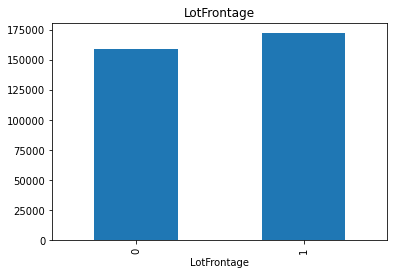

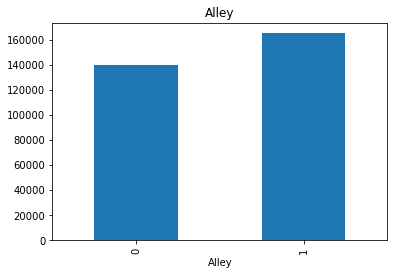

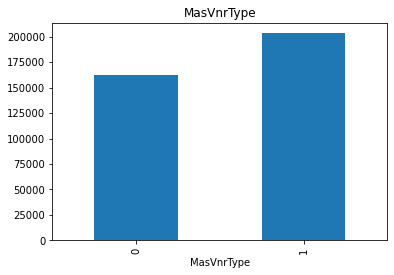

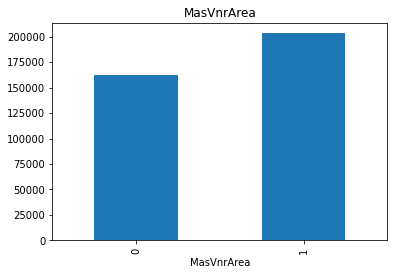

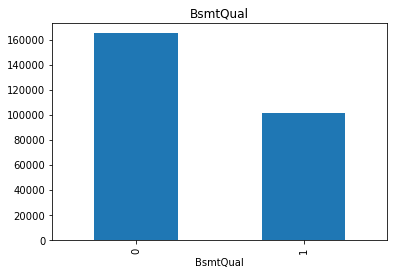

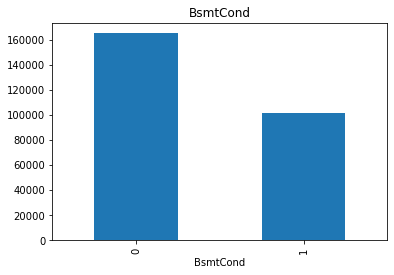

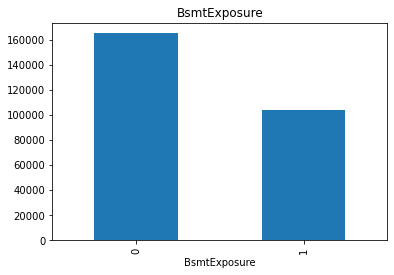

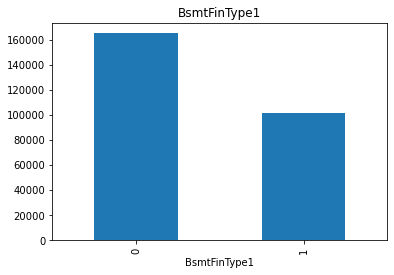

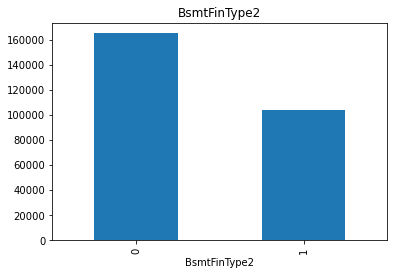

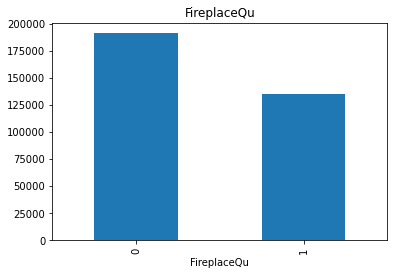

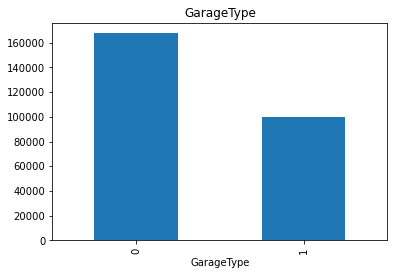

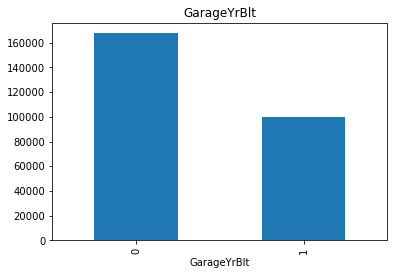

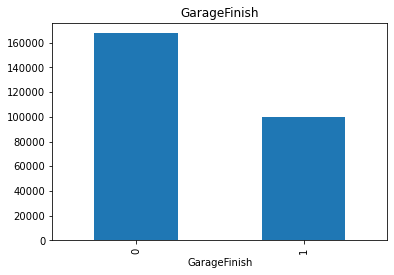

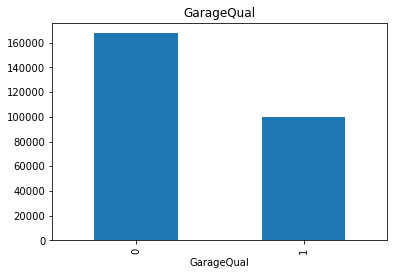

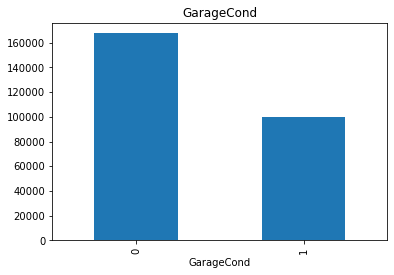

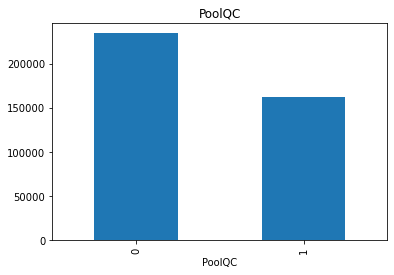

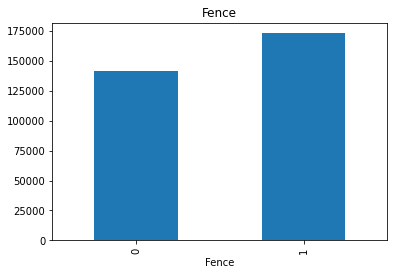

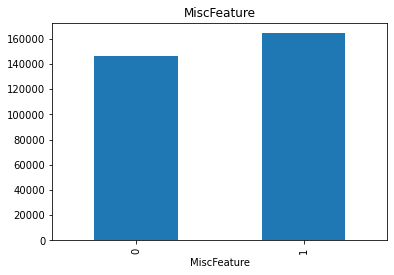

In [6]:
for feature in feature_with_na:
    data = data_df.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

With the relation between missing values and the dependent variable is clearly visible. So, We need to replace NaN values with something meaningful.

Some features are not requred for this dataset

In [7]:
print(f'id of houses {len(data_df.Id)}')

id of houses 1460


In [8]:
## to find numerical variables

numerical_variables = [feature for feature in data_df.columns if data_df[feature].dtypes != "O"]

print(f'The number of numerical variables are {len(numerical_variables)}')

The number of numerical variables are 38


In [9]:
data_df[numerical_variables].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporary Variables (Date Time Variables) 

From the dataset we habe four year variables. We extract information from the date time variables like no of years or no. of days. E.g :- Difference in year in which house was build to house was sold. 

In [10]:
year_feature = [feature for feature in numerical_variables if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
## Analysing the saleprice with year sold

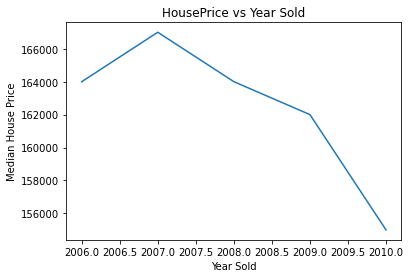

In [12]:
data.groupby("YrSold")['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("HousePrice vs Year Sold")
plt.show()

Analysing other yr features with the House prices

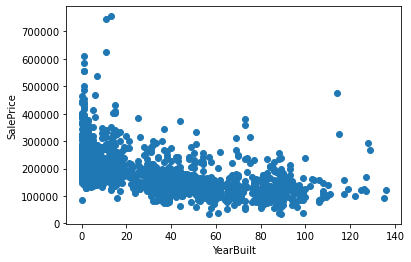

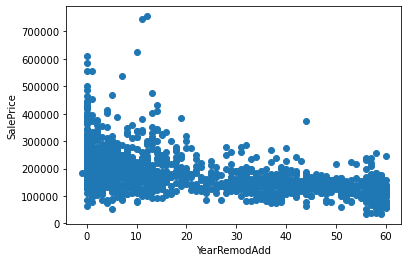

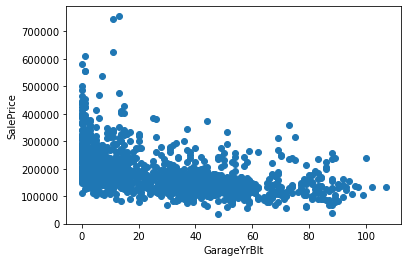

In [13]:
for feature in year_feature:
    if feature != 'YrSold':
        data = data_df.copy()
        
        data[feature] =  data["YrSold"] - data[feature]
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

In [14]:
## to find the discrete variables

discrete_variabels = [feature for feature in numerical_variables if len(data_df[feature].unique()) < 25 and feature not in year_feature + ["Id"]]

print(f'The number of discrete variables are {len(discrete_variabels)}')

The number of discrete variables are 17


In [15]:
discrete_variabels

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

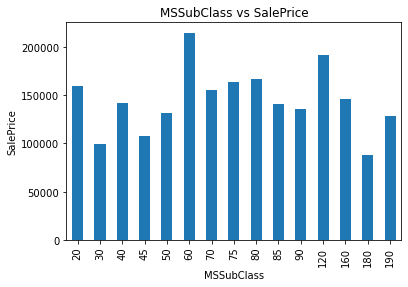

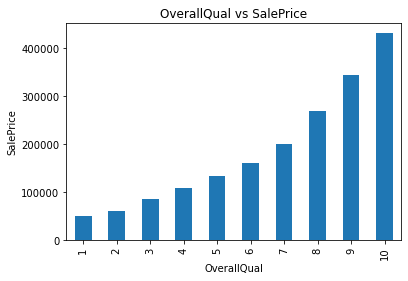

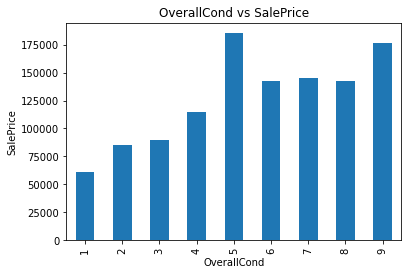

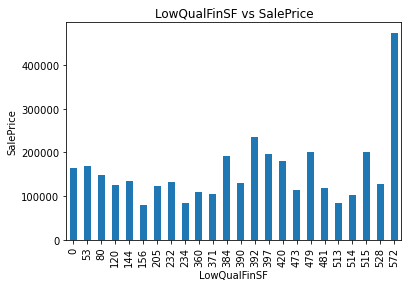

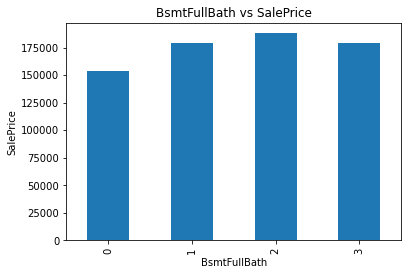

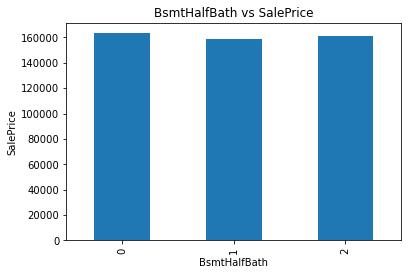

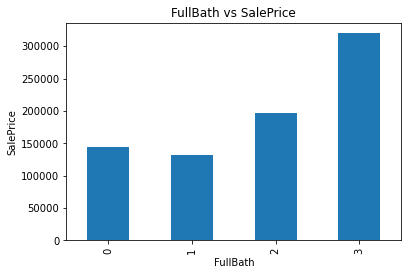

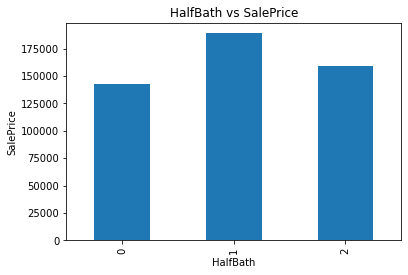

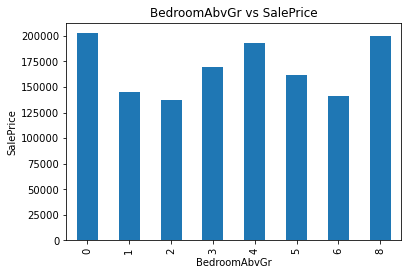

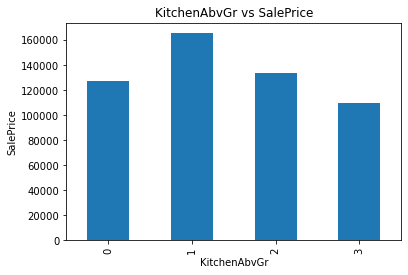

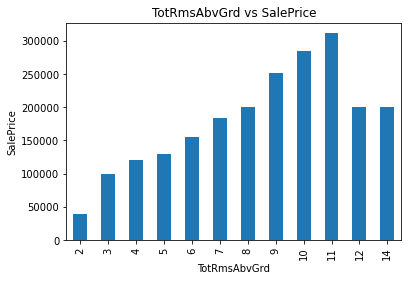

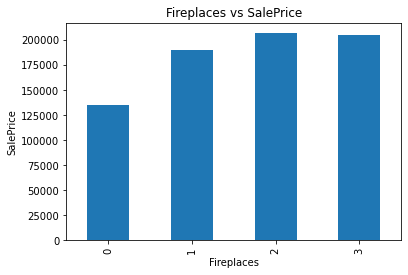

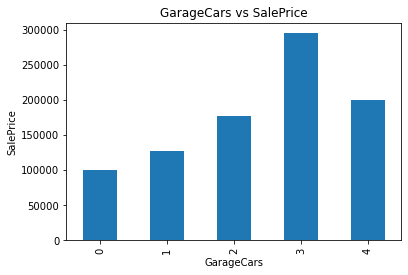

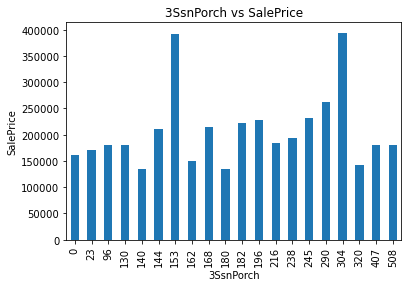

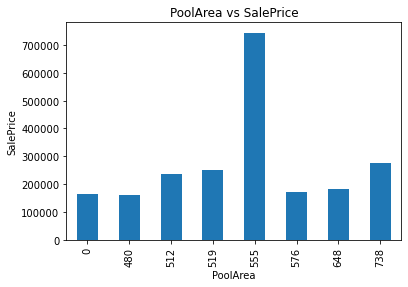

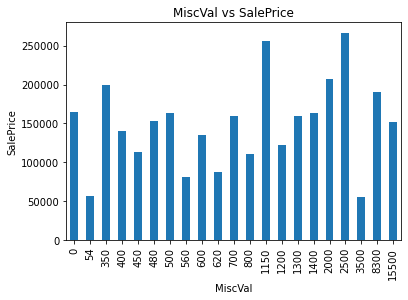

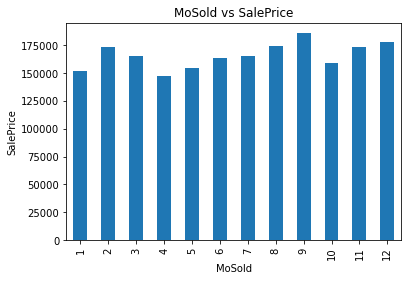

In [16]:
for feature in discrete_variabels:
    data = data_df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.show()

In [17]:
## To find the continuous variables

continuous_variables = [feature for feature in numerical_variables if feature not in discrete_variabels+ year_feature+["Id"]]

print(f'the no of continuous variables are {len(continuous_variables)}')

the no of continuous variables are 16


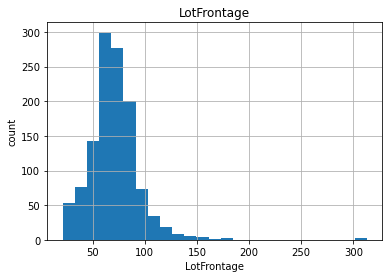

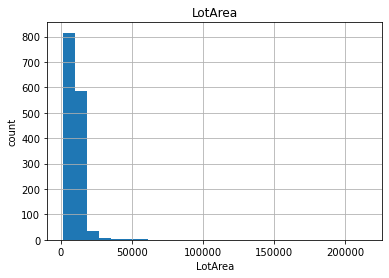

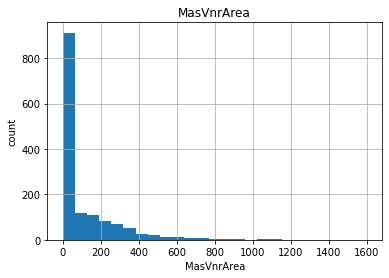

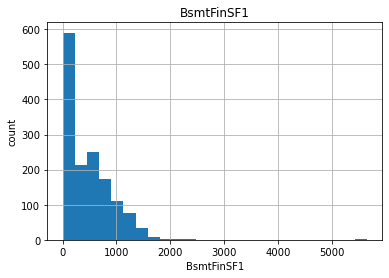

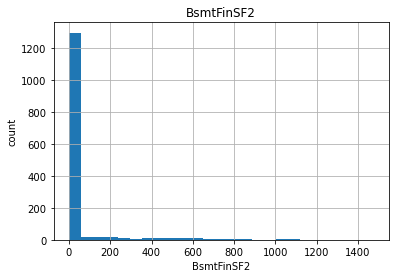

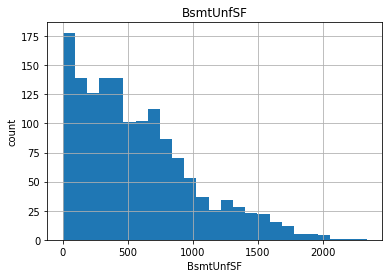

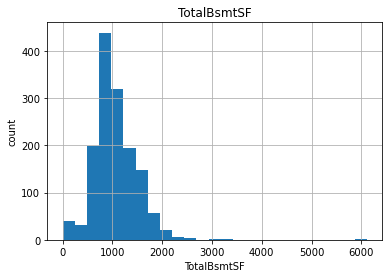

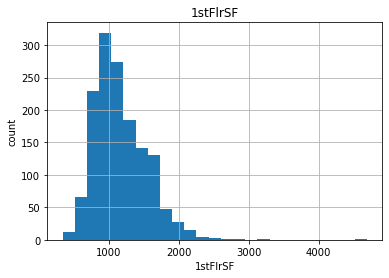

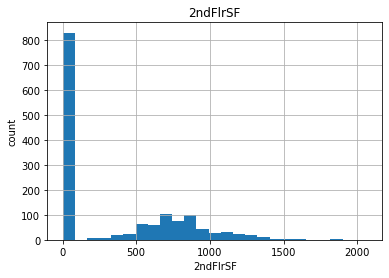

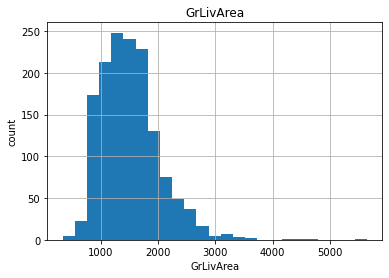

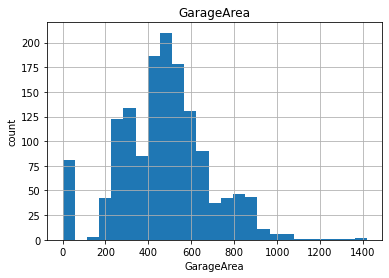

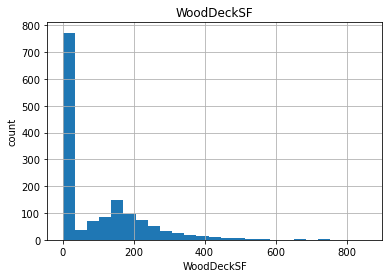

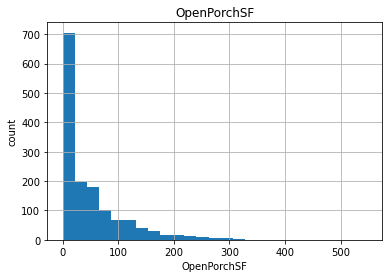

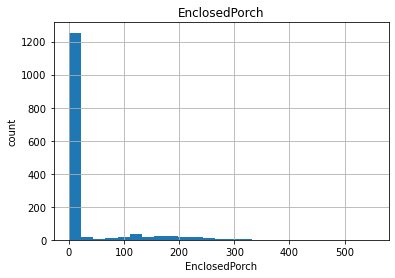

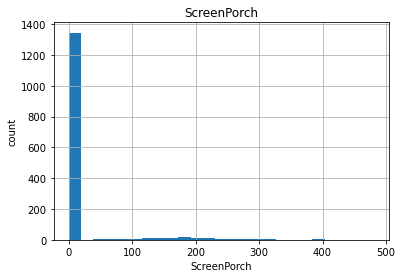

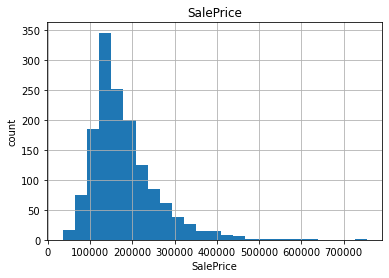

In [18]:
## analysing the continuous values with the saleprice

for feature in continuous_variables:
    data = data_df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

# Logarithmic Transformation

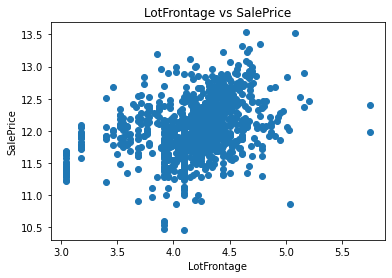

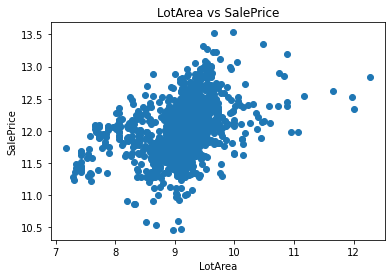

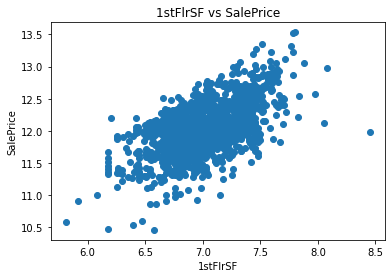

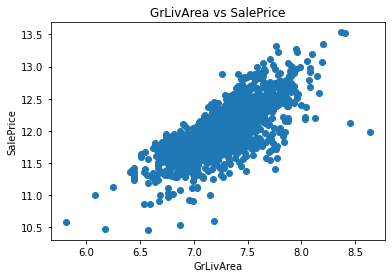

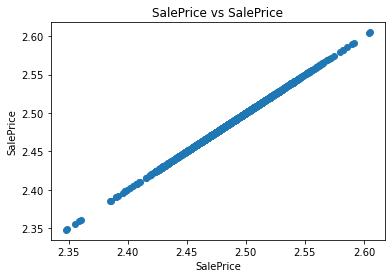

In [19]:
## we will be using logrithmic transformation


for feature in continuous_variables:
    data = data_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(f'{feature} vs SalePrice')
        plt.show()

## Detection of Outliers 

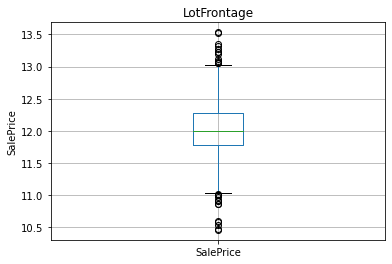

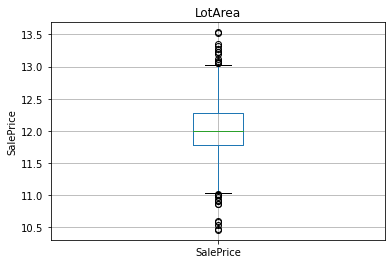

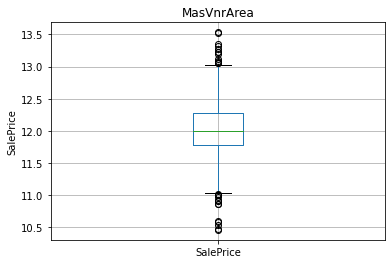

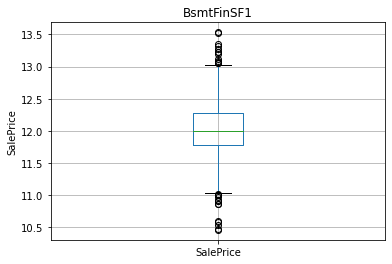

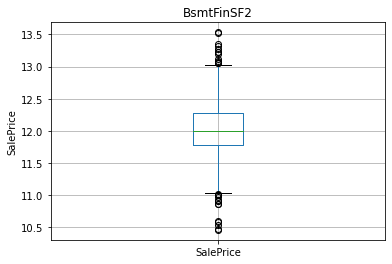

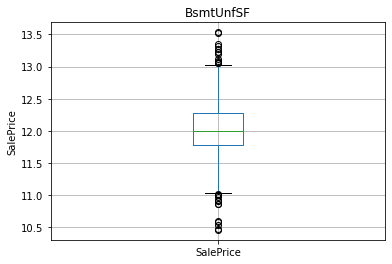

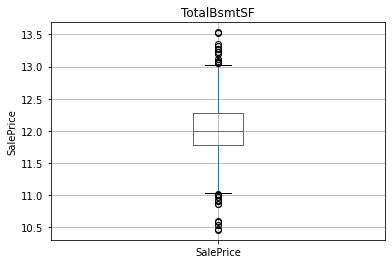

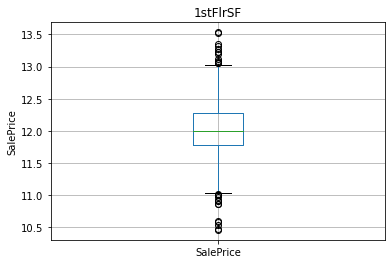

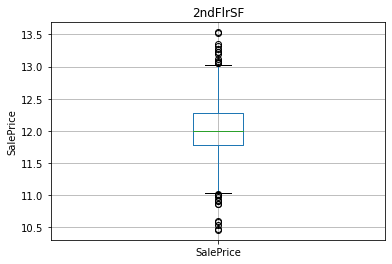

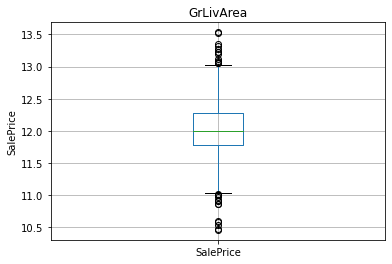

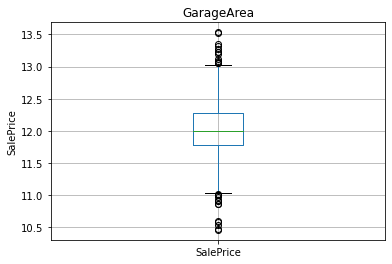

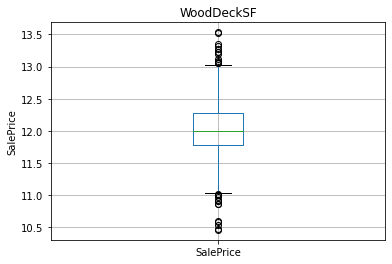

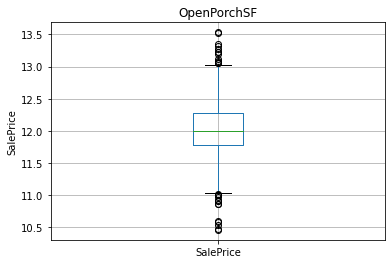

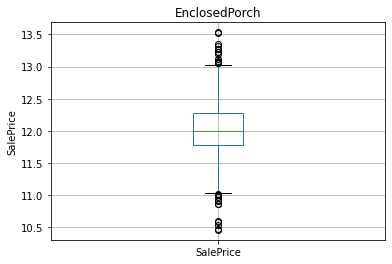

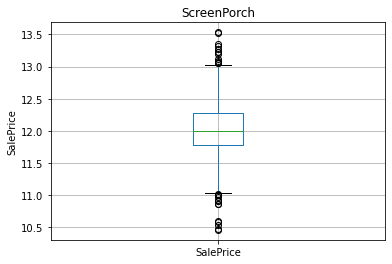

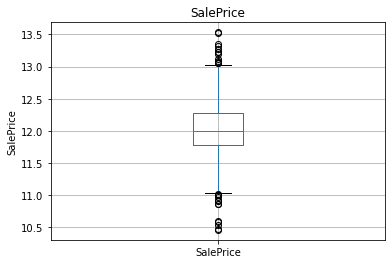

In [20]:
for featue in continuous_variables:
    data = data_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(featue)
        plt.show()

In [21]:
### Categorical Variables

categorical_features = [feature for feature in data_df.columns if data_df[feature].dtypes == 'O']
print(f'The len of categorical features is {len(categorical_features)}')

The len of categorical features is 43


In [22]:
data_df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
## total number of categorical variables

for feature in categorical_features:
    print(f' The numebr of values for {feature} is {len(data_df[feature].unique())}')

 The numebr of values for MSZoning is 5
 The numebr of values for Street is 2
 The numebr of values for Alley is 3
 The numebr of values for LotShape is 4
 The numebr of values for LandContour is 4
 The numebr of values for Utilities is 2
 The numebr of values for LotConfig is 5
 The numebr of values for LandSlope is 3
 The numebr of values for Neighborhood is 25
 The numebr of values for Condition1 is 9
 The numebr of values for Condition2 is 8
 The numebr of values for BldgType is 5
 The numebr of values for HouseStyle is 8
 The numebr of values for RoofStyle is 6
 The numebr of values for RoofMatl is 8
 The numebr of values for Exterior1st is 15
 The numebr of values for Exterior2nd is 16
 The numebr of values for MasVnrType is 5
 The numebr of values for ExterQual is 4
 The numebr of values for ExterCond is 5
 The numebr of values for Foundation is 6
 The numebr of values for BsmtQual is 5
 The numebr of values for BsmtCond is 5
 The numebr of values for BsmtExposure is 5
 The nume

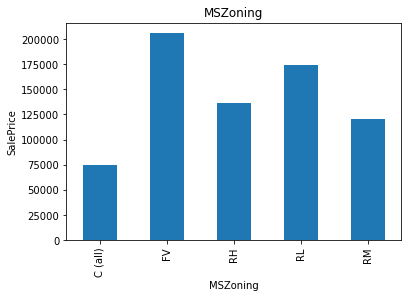

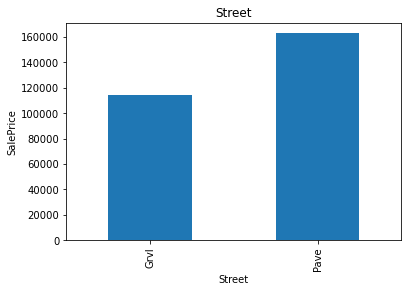

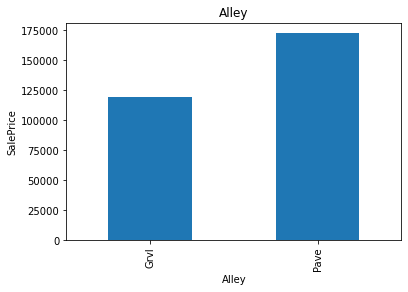

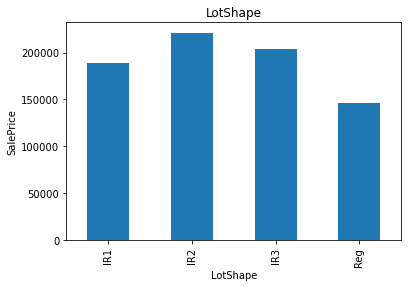

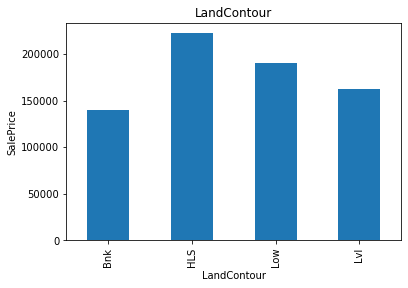

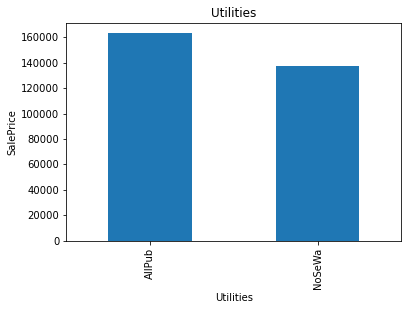

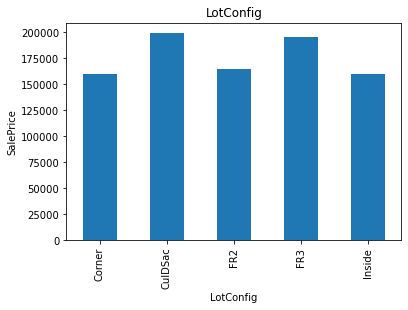

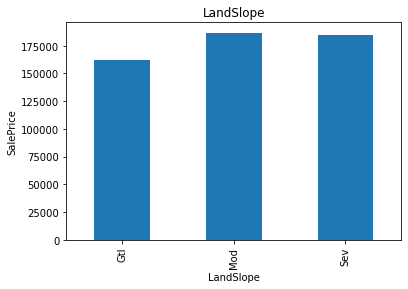

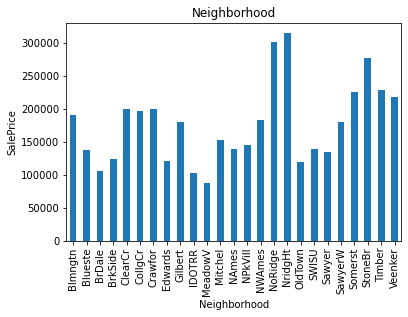

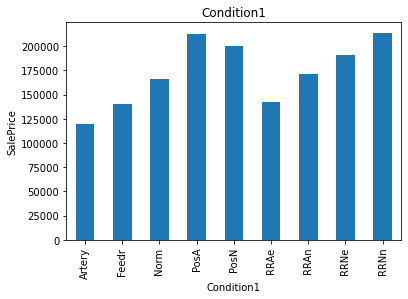

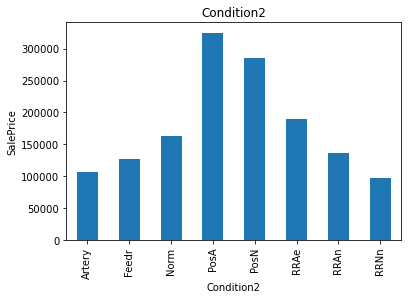

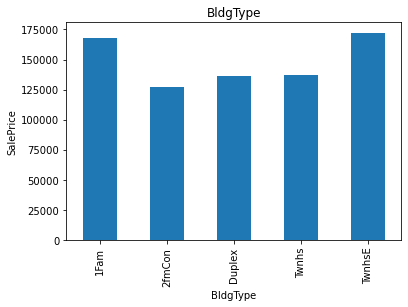

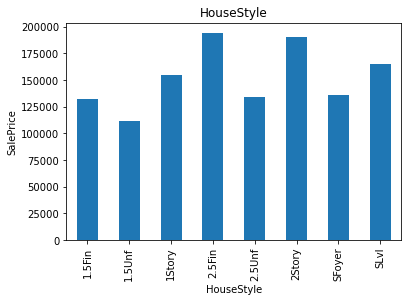

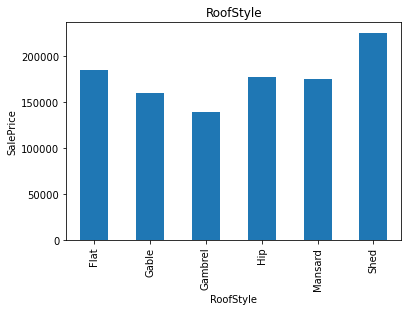

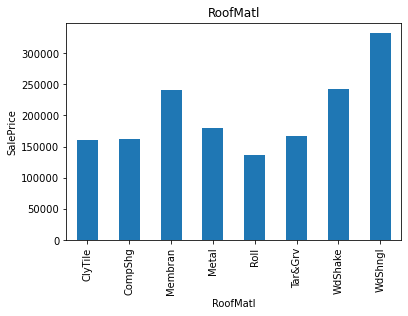

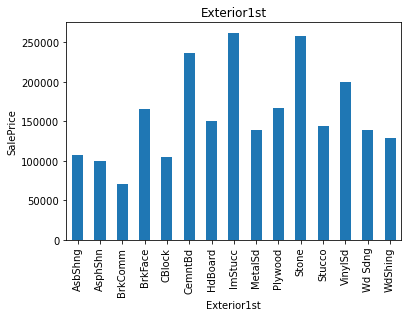

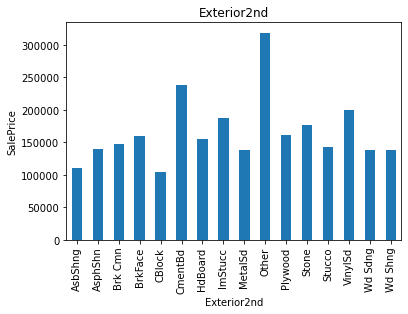

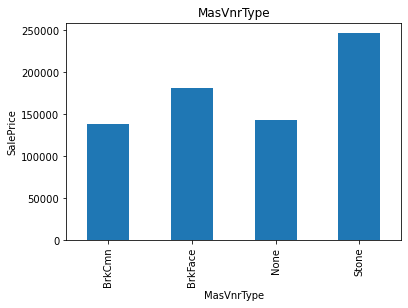

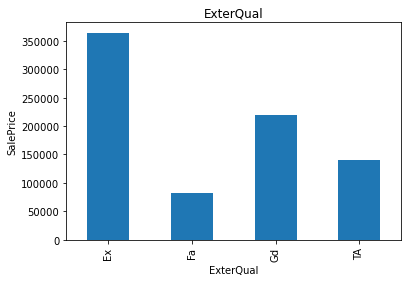

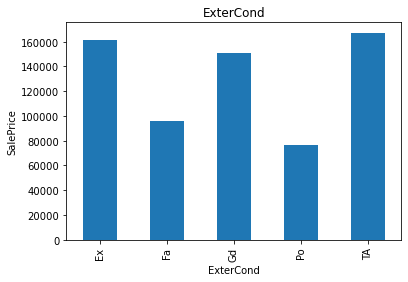

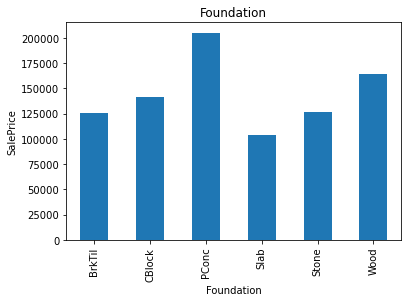

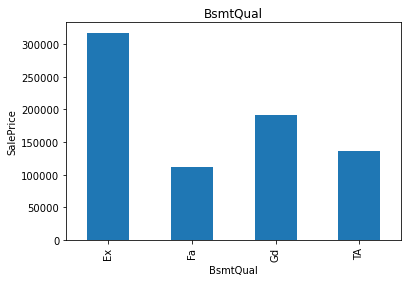

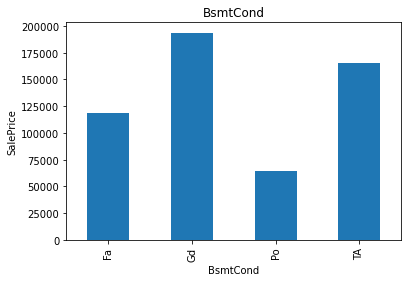

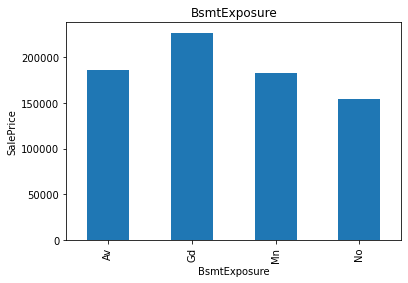

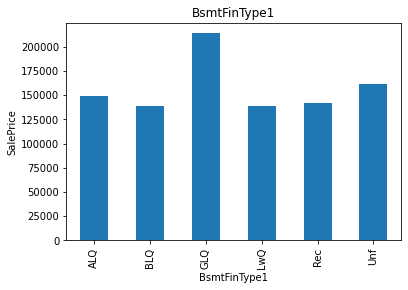

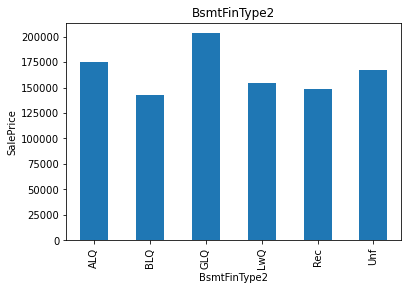

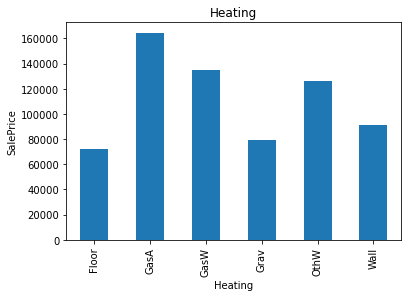

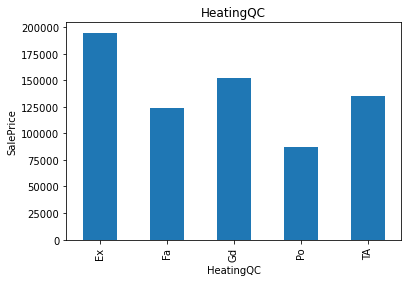

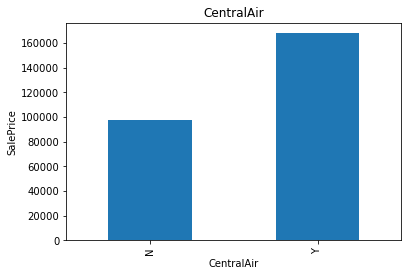

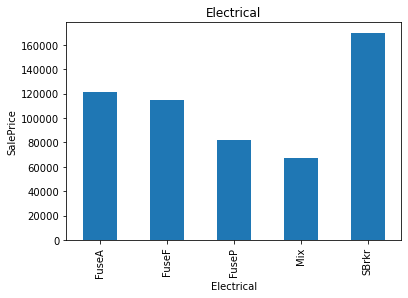

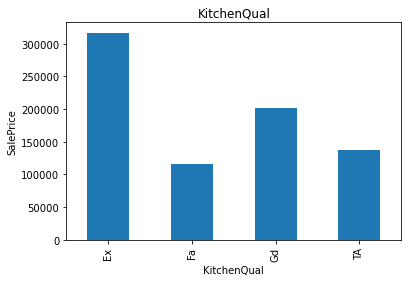

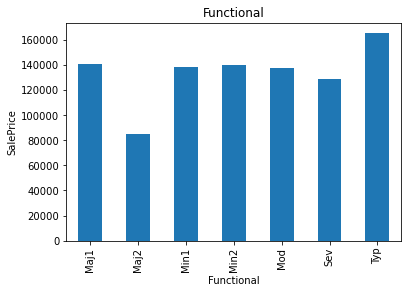

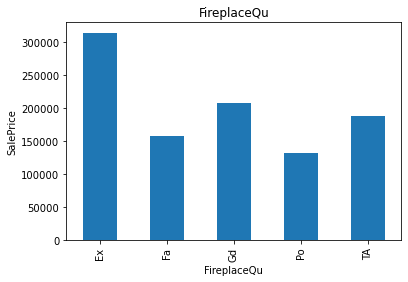

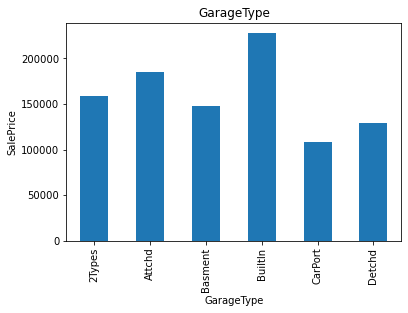

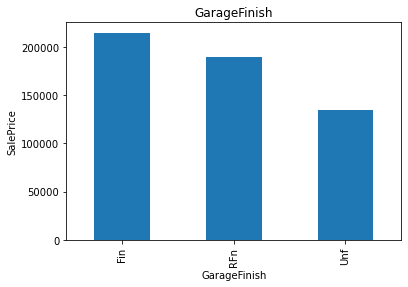

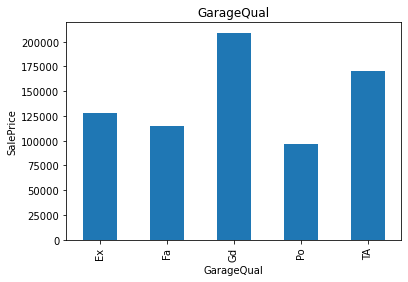

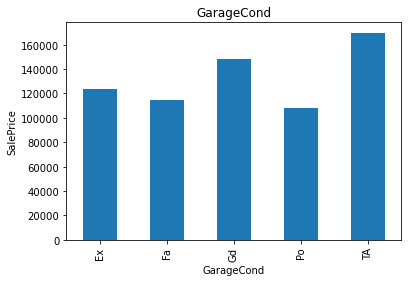

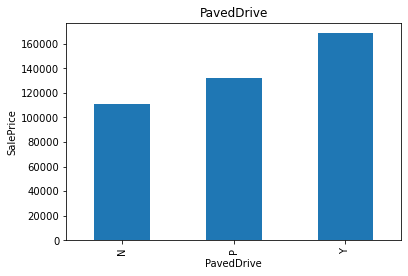

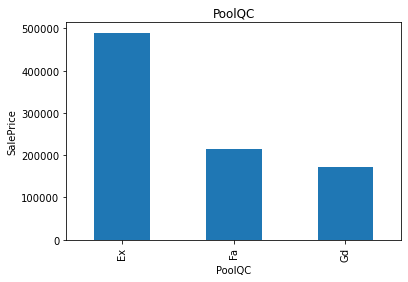

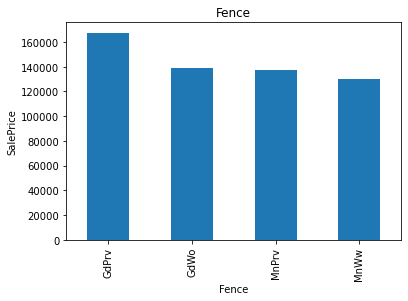

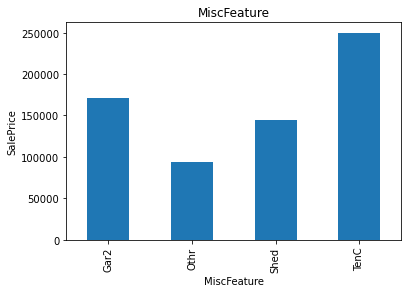

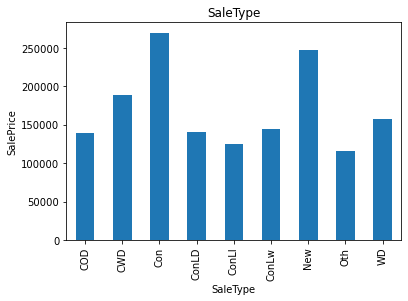

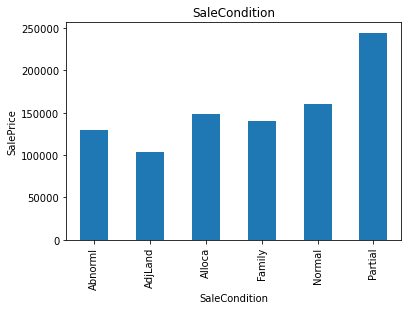

In [24]:
## relationship between categorical features and SalePrice

for feature in categorical_features:
    data = data_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Feature Engineering 

### Handling Missing values in Categorical and Numerical Data 

In [25]:
features_nan = [features for features in data_df.columns if data_df[features].isnull().sum()> 1 and data_df[features].dtypes == "O"]

for features in features_nan:
    print(f' The missing values are {features} having percentage of {np.round(data_df[features].isnull().mean(), 4)}')

 The missing values are Alley having percentage of 0.9377
 The missing values are MasVnrType having percentage of 0.0055
 The missing values are BsmtQual having percentage of 0.0253
 The missing values are BsmtCond having percentage of 0.0253
 The missing values are BsmtExposure having percentage of 0.026
 The missing values are BsmtFinType1 having percentage of 0.0253
 The missing values are BsmtFinType2 having percentage of 0.026
 The missing values are FireplaceQu having percentage of 0.4726
 The missing values are GarageType having percentage of 0.0555
 The missing values are GarageFinish having percentage of 0.0555
 The missing values are GarageQual having percentage of 0.0555
 The missing values are GarageCond having percentage of 0.0555
 The missing values are PoolQC having percentage of 0.9952
 The missing values are Fence having percentage of 0.8075
 The missing values are MiscFeature having percentage of 0.963


In [26]:
def cat_replace(data_df, features_nan):
    data = data_df.copy()
    data[features_nan] = data[features_nan].fillna("Missing Values")
    return data

data_df = cat_replace(data_df, features_nan)
data_df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [27]:
numerical_withNan = [feature for feature in data_df.columns if data_df[feature].isnull().sum()> 1 and data_df[feature].dtypes != "O"]

for feature in numerical_withNan:
    print(f'the % of missing values in {feature} is {np.round(data_df[feature].isnull().mean(), 4)}')

the % of missing values in LotFrontage is 0.1774
the % of missing values in MasVnrArea is 0.0055
the % of missing values in GarageYrBlt is 0.0555


In [28]:
for feature in numerical_withNan:
    median_value  = data_df[feature].median()
    
    data_df[feature+"nan"] = np.where(data_df[feature].isnull(), 1, 0)
    data_df[feature].fillna(median_value, inplace = True)
data_df[numerical_withNan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

## Handling DateTime Variables

In [29]:
for feature in ['YearBuilt', 'YearRemodAdd','GarageYrBlt']:
    data_df[feature] = data_df['YrSold'] - data_df[feature]

In [30]:
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing Values,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing Values,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing Values,Missing Values,Missing Values,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing Values,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing Values,Missing Values,Missing Values,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing Values,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing Values,Missing Values,Missing Values,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing Values,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing Values,Missing Values,Missing Values,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing Values,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing Values,Missing Values,Missing Values,0,12,2008,WD,Normal,250000,0,0,0


 Since, the numerical variables are skewed will perform log normal distribution

In [31]:
num_features = ["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea", "SalePrice"]

for feature in num_features:
    data_df[feature] = np.log(data_df[feature])

In [32]:
data_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing Values,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing Values,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing Values,Missing Values,Missing Values,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing Values,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing Values,Missing Values,Missing Values,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing Values,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing Values,Missing Values,Missing Values,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing Values,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing Values,Missing Values,Missing Values,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing Values,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing Values,Missing Values,Missing Values,0,12,2008,WD,Normal,12.429216,0,0,0


## Categorical Features 

In [33]:
for feature in categorical_features:
    temp = data_df.groupby(feature)['SalePrice'].count()/len(data_df)
    temp_df = temp[temp>0.01].index
    data_df[feature] = np.where(data_df[feature].isin(temp_df), data_df[feature], "Rare_var")

In [34]:
data_df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing Values,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing Values,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing Values,Missing Values,Missing Values,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing Values,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing Values,Missing Values,Missing Values,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing Values,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing Values,Missing Values,Missing Values,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing Values,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing Values,Missing Values,Missing Values,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing Values,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing Values,Missing Values,Missing Values,0,12,2008,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9.186560,Pave,Missing Values,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,6.522093,790,0,7.293018,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,Missing Values,Missing Values,Shed,480,4,2009,WD,Normal,12.128111,1,0,0
96,97,20,RL,4.356709,9.236398,Pave,Missing Values,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,7.370231,0,0,7.370231,0,0,2,0,3,1,Gd,6,Typ,0,Missing Values,Attchd,7.0,RFn,2,472,TA,TA,Y,158,29,0,0,0,0,Missing Values,Missing Values,Missing Values,0,8,2006,WD,Normal,12.273731,0,0,0
97,98,20,RL,4.290459,9.

In [35]:
for feature in categorical_features:
    data_df[feature] = pd.get_dummies(data_df[feature])
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,0,4.174387,9.041922,1,0,0,0,1,0,1,0,0,1,1,0,7,5,5,5,1,1,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,1,1,0,0,6.752270,854,0,7.444249,1,0,2,1,3,1,0,8,0,0,0,1,5.0,0,2,548,0,0,0,0,61,0,0,0,0,1,0,1,0,2,2008,0,0,12.247694,0,0,0
1,2,20,0,4.382027,9.169518,1,0,0,0,1,0,1,0,0,1,1,0,6,8,31,31,1,1,0,0,0,0.0,0,0,0,0,0,0,1,978,0,0,284,1262,1,1,0,0,7.140453,0,0,7.140453,0,1,2,0,3,1,0,6,0,1,0,1,31.0,0,2,460,0,0,0,298,0,0,0,0,0,1,0,1,0,5,2007,0,0,12.109011,0,0,0
2,3,60,0,4.219508,9.328123,1,0,1,0,1,0,1,0,0,1,1,0,7,5,7,6,1,1,0,0,0,162.0,0,0,0,0,0,0,0,486,0,0,434,920,1,1,0,0,6.824374,866,0,7.487734,1,0,2,1,3,1,0,6,0,1,0,1,7.0,0,2,608,0,0,0,0,42,0,0,0,0,1,0,1,0,9,2008,0,0,12.317167,0,0,0
3,4,70,0,4.094345,9.164296,1,0,1,0,1,1,1,0,0,1,1,0,7,5,91,36,1,1,0,0,0,0.0,0,0,1,0,0,0,1,216,0,0,540,756,1,0,0,0,6.867974,756,0,7.448334,1,0,1,0,3,1,0,7,0,1,0,0,8.0,0,3,642,0,0,0,0,35,272,0,0,0,1,0,1,0,2,2006,0,1,11.849398,0,0,0
4,5,60,0,4.430817,9.565214,1,0,1,0,1,0,1,0,0,1,1,0,8,5,8,8,1,1,0,0,0,350.0,0,0,0,0,0,1,0,655,0,0,490,1145,1,1,0,0,7.043160,1053,0,7.695303,1,0,2,1,4,1,0,9,0,1,0,1,8.0,0,3,836,0,0,0,192,84,0,0,0,0,1,0,1,0,12,2008,0,0,12.429216,0,0,0


##  Feature Scaling

In [36]:
feature_scaling = [feature for feature in data_df.columns if feature not in ["Id", "SalePrice"]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_df[feature_scaling])

MinMaxScaler()

In [37]:
dataset = pd.concat([data_df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data_df[feature_scaling]), columns = feature_scaling)], axis = 1)

In [38]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.0,0.418208,0.366344,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.500,0.036765,0.098361,1.0,1.0,0.0,0.0,0.0,0.12250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125089,0.0,0.0,0.064212,0.140098,1.0,1.0,0.0,0.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.500000,0.0,0.000000,0.0,1.0,0.046729,0.0,0.50,0.386460,0.0,0.0,0.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.090909,0.50,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.0,0.495064,0.391317,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.173281,0.0,0.0,0.121575,0.206547,1.0,1.0,0.0,0.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.0,0.333333,0.0,0.333333,0.0,1.0,0.289720,0.0,0.50,0.324401,0.0,0.0,0.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.363636,0.25,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.0,0.434909,0.422359,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.500,0.051471,0.114754,1.0,1.0,0.0,0.0,0.0,0.10125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086109,0.0,0.0,0.185788,0.150573,1.0,1.0,0.0,0.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.333333,0.0,0.333333,0.0,1.0,0.065421,0.0,0.50,0.428773,0.0,0.0,0.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.727273,0.50,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.0,0.388581,0.390295,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.038271,0.0,0.0,0.231164,0.123732,1.0,0.0,0.0,0.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.0,0.416667,0.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.452750,0.0,0.0,0.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.090909,0.00,0.0,1.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.0,0.513123,0.468761,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.777778,0.500,0.058824,0.147541,1.0,1.0,0.0,0.0,0.0,0.21875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.116052,0.0,0.0,0.209760,0.187398,1.0,1.0,0.0,0.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.0,0.583333,0.0,0.333333,0.0,1.0,0.074766,0.0,0.75,0.589563,0.0,0.0,0.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.50,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

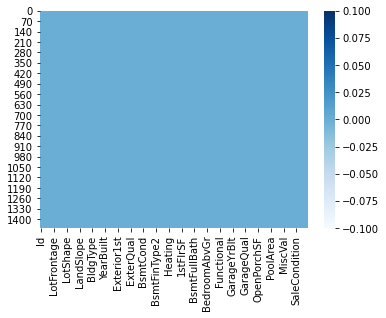

In [39]:
sns.heatmap(dataset.isnull(),cmap='Blues' )

In [40]:
dataset.to_csv("Sorted_X_train.csv", index = False)

# Feature Selection

In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [42]:
data1 = pd.read_csv('Sorted_X_train.csv')

In [43]:
data1.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.0,0.418208,0.366344,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.500,0.036765,0.098361,1.0,1.0,0.0,0.0,0.0,0.12250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125089,0.0,0.0,0.064212,0.140098,1.0,1.0,0.0,0.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.500000,0.0,0.000000,0.0,1.0,0.046729,0.0,0.50,0.386460,0.0,0.0,0.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.090909,0.50,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.0,0.495064,0.391317,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.173281,0.0,0.0,0.121575,0.206547,1.0,1.0,0.0,0.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.0,0.333333,0.0,0.333333,0.0,1.0,0.289720,0.0,0.50,0.324401,0.0,0.0,0.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.363636,0.25,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.0,0.434909,0.422359,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.500,0.051471,0.114754,1.0,1.0,0.0,0.0,0.0,0.10125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086109,0.0,0.0,0.185788,0.150573,1.0,1.0,0.0,0.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.333333,0.0,0.333333,0.0,1.0,0.065421,0.0,0.50,0.428773,0.0,0.0,0.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.727273,0.50,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.0,0.388581,0.390295,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.038271,0.0,0.0,0.231164,0.123732,1.0,0.0,0.0,0.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.0,0.416667,0.0,0.333333,0.0,0.0,0.074766,0.0,0.75,0.452750,0.0,0.0,0.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.090909,0.00,0.0,1.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.0,0.513123,0.468761,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.777778,0.500,0.058824,0.147541,1.0,1.0,0.0,0.0,0.0,0.21875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.116052,0.0,0.0,0.209760,0.187398,1.0,1.0,0.0,0.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.0,0.583333,0.0,0.333333,0.0,1.0,0.074766,0.0,0.75,0.589563,0.0,0.0,0.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.50,0.0,0.0,0.0,0.0,0.0


In [44]:
X = data1.drop(['Id', 'SalePrice'], axis =1)
y = data1['SalePrice']



In [45]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [46]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [47]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [48]:
print(f'Total_features : {X.shape[1]}')
print(f'Selected featues : {len(selected_feat)}')

Total_features : 82
Selected featues : 21


In [49]:
selected_feat

Index(['LotShape', 'BldgType', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [50]:
df = data1[['LotShape', 'BldgType', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition']]
    

In [51]:
df.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Foundation,BsmtQual,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.0,1.0,0.666667,0.036765,0.098361,1.0,0.0,0.0,1.0,0.0,0.356155,0.577712,0.333333,0.666667,0.0,0.000000,1.0,0.0,0.50,0.0,0.0
1,0.0,1.0,0.555556,0.227941,0.524590,1.0,0.0,0.0,1.0,0.0,0.503056,0.470245,0.000000,0.666667,0.0,0.333333,1.0,0.0,0.50,0.0,0.0
2,1.0,1.0,0.666667,0.051471,0.114754,1.0,0.0,0.0,1.0,0.0,0.383441,0.593095,0.333333,0.666667,0.0,0.333333,1.0,0.0,0.50,0.0,0.0
3,1.0,1.0,0.666667,0.669118,0.606557,1.0,1.0,0.0,0.0,0.0,0.399941,0.579157,0.333333,0.333333,0.0,0.333333,0.0,0.0,0.75,0.0,1.0
4,1.0,1.0,0.777778,0.058824,0.147541,1.0,0.0,0.0,1.0,0.0,0.466237,0.666523,0.333333,0.666667,0.0,0.333333,1.0,0.0,0.75,0.0,0.0


In [52]:
X = df
y = dataset["SalePrice"]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [54]:
X_train.shape

(1022, 21)

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
def models(a, b):
    #linear Regression
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(a, b)
    
    #Decision Tree Regressor
    from sklearn.tree import DecisionTreeRegressor
    dt = DecisionTreeRegressor()
    dt.fit(a, b)
    
    # Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators = 100)
    rf.fit(X_train, y_train)
    
    print("The accuracy of Linear Regression", reg.score(a, b))
    print("The accuracy of Decision Tree Regressor", dt.score(a, b))    
    print("The accuracy of Random Forest", rf.score(a, b))   
    return reg, dt, rf

In [57]:
model = models(X_train, y_train)

The accuracy of Linear Regression 0.86877954778442
The accuracy of Decision Tree Regressor 0.9999620492099336
The accuracy of Random Forest 0.9789456355882078


In [58]:
print("mean squared error of linear regression:", mean_squared_error(y_test,model[0].predict(X_test)))
print("mean squared error of Decision Tree regression:", mean_squared_error(y_test,model[1].predict(X_test)))
print("mean squared error of random forest regression:", mean_squared_error(y_test,model[0].predict(X_test)))

mean squared error of linear regression: 0.020969198632747245
mean squared error of Decision Tree regression: 0.05209211357920306
mean squared error of random forest regression: 0.020969198632747245


In [62]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators = 899, 
                              mon_child_weight = 2,
                              learning_rate = 0.05,
                              booster = 'gbtree')

In [63]:
xgb_reg.fit(X_train, y_train)

[16:32:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "mon_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan, mon_child_weight=2,
             monotone_constraints='()', n_estimators=899, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
xgb_reg.score(X_train, y_train)

0.9992994091408974

In [67]:
print("mean squared error of xgbosot:", mean_squared_error(y_test, xgb_reg.predict(X_test)))

mean squared error of xgbosot: 0.025173991863817007


Since our model is already having very good accuracy thus hyparameter tuning is not required, had we needed to improve our accuracy than we could have tuned the hyperparameters 

Out of all the models xgboost seems to be our best model

In [69]:
y_pred = (model[2].predict(X_test) + xgb_reg.predict(X_test))/2

In [70]:
print("mean squared error:", mean_squared_error(y_test, y_pred))

mean squared error: 0.021301643012747756


In [71]:
print(y_test)

245     12.394625
1425    11.863582
1361    12.468437
1159    12.128111
273     11.842229
          ...    
106     11.512925
775     11.995352
1383    11.626254
1038    11.482466
593     11.849398
Name: SalePrice, Length: 438, dtype: float64


In [73]:
print(pd.DataFrame(y_pred))

             0
0    12.269637
1    11.989832
2    12.390999
3    12.065125
4    12.005416
..         ...
433  11.452665
434  12.065699
435  11.791053
436  11.716907
437  11.857590

[438 rows x 1 columns]
